<h1 id="Contents">Contents<a href="#Contents"></a></h1>
        <ol>
        <li><a class="" href="#History">History</a></li>
<li><a class="" href="#Linear-Regression-in-Scikit-Learn">Linear Regression in Scikit-Learn</a></li>
<ol><li><a class="" href="#Ordinary-Least-Squares">Ordinary Least Squares</a></li>
<ol><li><a class="" href="#Non-Negative-Least-Squares">Non-Negative Least Squares</a></li>
<li><a class="" href="#Ordinary-Least-Squares-Complexity">Ordinary Least Squares Complexity</a></li>
<li><a class="" href="#Ordinary-Least-Squares-Parameters">Ordinary Least Squares Parameters</a></li>
<li><a class="" href="#Ordingary-Least-Squares-Attributes">Ordingary Least Squares Attributes</a></li>
</ol><li><a class="" href="#Ridge">Ridge</a></li>
<ol><li><a class="" href="#Ridge-Complexity">Ridge Complexity</a></li>
<li><a class="" href="#Ridge-Parameters">Ridge Parameters</a></li>
<li><a class="" href="#Ridge-Attributes">Ridge Attributes</a></li>
</ol><li><a class="" href="#Lasso">Lasso</a></li>
<ol><li><a class="" href="#Lasso-Complexity">Lasso Complexity</a></li>
<li><a class="" href="#Lasso-Parameters">Lasso Parameters</a></li>
<li><a class="" href="#Lasso-Attributes">Lasso Attributes</a></li>
</ol><li><a class="" href="#Elastic-Net">Elastic Net</a></li>
<ol><li><a class="" href="#Elastic-Net-Parameters">Elastic Net Parameters</a></li>
<li><a class="" href="#Elastic-Net-Attributes">Elastic Net Attributes</a></li>
</ol><li><a class="" href="#Least-Angle-Regression">Least Angle Regression</a></li>
<li><a class="" href="#Polynomial-Regression">Polynomial Regression</a></li>
</ol>

# History

Regression is based on the method of least squares or the method of minimum mean square error. The ideas around least squares or averaging errors have evolved over nearly three centuries. The first known publication of a ‘Method of Averages’ was by the German astronomer Tobias Mayer in 1750. Pierre-Simon Laplace published in 1788 a similar method. The first publication of the method of least squares was by the French mathematician Adrien-Marie Legendre in 1805.

As a historical aside, it is very likely that the German physicist and mathematician Carl Friedrich Gauss developed the method of least-squares as early as 1795, but he did not publish this method until 1809. Legendre firmly opposed any notion that Gauss had used the method earlier than the 1805 publishing date.

Francis Galton, a cousin of Charles Darwin, coined the term regression in 1886. Galton was interested in determining which traits of plants and animals, including humans, could be said to be inherited. While Galton invented a modern form of regression, it was Karl Pearson who put regression and multiple regression on a firm mathematical footing. He created the world’s first university statistics department at UCL. Pearson’s 1898 publication proposed a method of regression as we understand it today.

Numerous others have expanded the theory of regression over the last century since Pearson’s pivotal paper. Notably, Joseph Berkson published the logistic regression method in 1944, one of the first classification algorithms. In recent times the explosion of interest in machine learning (ML) has lead to a rapid increase in the numbers and types of regression models.

[source](https://towardsdatascience.com/an-introduction-to-linear-regression-9cbb64b52d23)

# Linear Regression in Scikit-Learn

## Ordinary Least Squares

The linear model is given by:
$$
\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p
$$

In scikit-learn, the linear model is represented by the LinearRegression class. Across the module, we designate the vector $w = (w_1,
..., w_p)$ as `coef_` and $w_0$ as `intercept_`.

`LinearRegression` fits a linear model with coefficients $w = (w_1,
..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
$$\min_{w} || X w - y||_2^2$$

`LinearRegression` will take in its `fit` method arrays X, y and will store the coefficients $w$ of the linear model in its `coef_` member.

In [40]:
from sklearn import linear_model
import numpy as np
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([0.5, 0.5])

The coefficient estimates for Ordinary Least Squares rely on the independence of the features. When features are correlated and the columns of the design matrix $X$ have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance.

### Non-Negative Least Squares

It is possible to constrain all the coefficients to be non-negative, which may be useful when they represent some physical or naturally non-negative quantities. `LinearRegression` accepts a boolean `positive` parameter: when set to True Non-Negative Least Squares are then applied.

### Ordinary Least Squares Complexity

The least squares solution is computed using the singular value decomposition of $X$. If $X$ is a matrix of shape `(n_samples, n_features)` this method has a cost of $O(n_{\text{samples}} n_{\text{features}}^2)$
, assuming that $n_{\text{samples}} \geq n_{\text{features}}$.

### Ordinary Least Squares Parameters

Here are the parameters of the `LinearRegression` class takes:
* **fit_intercept**: boolean, optional, default True

    Whether to calculate the intercept for this model.
* **normalize**: boolean, optional, default False

    This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. 
* **copy_X**: boolean, optional, default True
* **n_jobs**: integer, optional, default 1
* **positive**: boolean, optional, default False

    When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

### Ordingary Least Squares Attributes

Here are the attributes of the `LinearRegression` class:

* **coef_**: array, shape (n_features, ) or (n_targets, n_features)
 
    Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features. The intercept is not included.
* **intercept_**: array, shape (n_targets, ) or (n_targets, n_features)
* **rank_**: Rank of matrix `X`. Only available when `X` is dense.

In [29]:
from sklearn.datasets import make_regression
n_samples = int(1e2)
X, y = make_regression(n_samples=n_samples, n_features=1,noise=10, random_state=42)
reg.fit(X, y)

LinearRegression()

In [30]:
reg.coef_, reg.intercept_

(array([44.43716999]), 1.1651153205269726)

In [31]:
plt.rcdefaults()

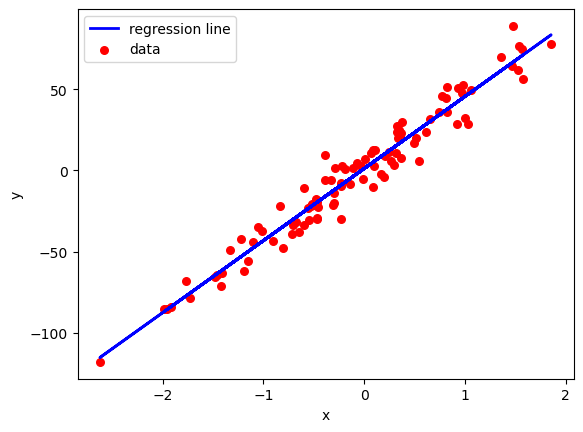

In [32]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='red', marker='o', s=30, label='data')
y_line = reg.coef_ * X + reg.intercept_
plt.plot(X, y_line, color='blue', linewidth=2, label='regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

## Ridge

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:$$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$$

The complexity parameter $\alpha \geq 0$ controls the amount of shrinkage: the larger the value of , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

> For details, follow the [paper](http://cbcl.mit.edu/publications/ps/MIT-CSAIL-TR-2007-025.pdf).

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_001.png)

In [38]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X, y)

Ridge(alpha=10)

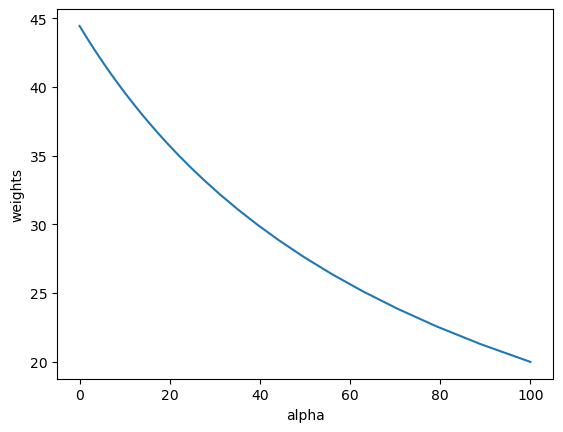

In [42]:
alphas = np.logspace(-3, 2, 100)
w = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a)
    ridge.fit(X, y)
    w.append(ridge.coef_[0])

plt.plot(alphas, w, '-', )
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

We can see that increasing the value of $\alpha$ increases the amount of shrinkage and thus the coefficients become smaller.

### Ridge Complexity

The ridge has the same time complexity as the ordinary least squares. That is, the complexity of the ridge is $O(n_{\text{samples}} n_{\text{features}}^2)$ assuming that $n_{\text{samples}} \geq n_{\text{features}}$.

### Ridge Parameters

Here are some of the parameters of the `Ridge` class:
* **alpha**: float, optional, default 1.0
  
    Constant that multiplies the L2 term, controlling regularization strength. alpha must be a non-negative float i.e. in `[0, inf)`.
    When `alpha = 0`, the objective is equivalent to ordinary least squares, solved by the `LinearRegression` object.
* **fit_intercept**: boolean, optional, default True
      
     Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (i.e. data is expected to be centered).
* **normalize**: boolean, optional, default False
    
    This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.

* **solver**: {"auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga", "lbfgs"}, default="auto"
  
    Solver to use in the computational routines:
    * "auto" chooses the solver automatically based on the type of data.
    * "svd" uses a Singular Value Decomposition to solve the problem.
    * "cholesky" uses the conjugate gradient solver as found in `scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than "cholesky" for large-scale data (possibility to set `tol` and `max_iter`).
    * "lsqr" uses the standard `scipy.sparse.linalg.lsqr` function to solve the problem.
    * "sparse_cg" uses a conjugate gradient solver to solve the problem.
    * "saga" uses a Stochastic Average Gradient descent, and "saga" uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that "sag" and "saga" fast convergence is only guaranteed on features with approximately the same scale.
    * "lbfgs" uses L-BFGS-B algorithm implemented in `scipy.optimize.minimize`. It can be used only when `positive` is True.

### Ridge Attributes

Here are the attributes of the `Ridge` class:

* **coef_**: array, shape (n_features, ) or (n_targets, n_features)
 
    Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features. The intercept is not included.
* **intercept_**: array, shape (n_targets, ) or (n_targets, n_features)
* **n_iter_**: None or ndarray of shape (n_targets,)
  
    Actual number of iterations for each target. Available only for sag and lsqr solvers. Other solvers will return None.

> **RidgeCV** implements ridge regression with built-in cross-validation of the alpha parameter. The object works in the same way as GridSearchCV except that it defaults to Leave-One-Out Cross-Validation.

In [43]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.alpha_

0.01

Specifying the value of the `cv` attribute will trigger the use of cross-validation with `GridSearchCV`, for example `cv=10` for 10-fold cross-validation, rather than Leave-One-Out Cross-Validation.

## Lasso

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent.

Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$
The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha ||w||_1$ added, where $\alpha$ is a constant and $||w||_1$ is the norm of the coefficient vector.

The implementation in the class Lasso uses coordinate descent as the algorithm to fit the coefficients.

> For details, se the [paper](https://www.jstatsoft.org/article/view/v033i01/v33i01.pdf) and the [paper](https://web.stanford.edu/~boyd/papers/pdf/l1_ls.pdf).

### Lasso Complexity

Lasso has the same time complexity as the ordinary least squares. That is, the complexity of the lasso is $O(n_{\text{samples}} n_{\text{features}}^2)$ assuming that $n_{\text{samples}} \geq n_{\text{features}}$.

### Lasso Parameters

`Lasso` has the same parameters as the `Ridge` class with the following exceptions:
* It does not have the `solver` parameter.
There are some extra parameters for the Lasso:
* **warm_start**: bool, default=False

    When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution.
* **selection**: {‘cyclic’, ‘random’}, default=’cyclic’
   
   If set to ‘random’, a random coefficient is updated every iteration rather than looping over features sequentially by default. This (setting to ‘random’) often leads to significantly faster convergence especially when tol is higher than 1e-4.

### Lasso Attributes

`Lasso` has the same attributes as the `Ridge` class.

> Same as `RidgeCV`, `LassoCV` uses cross-validation to find the best regularization parameter for lasso.

In [47]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X, y)
reg.score(X, y)

0.9993566905623871

## Elastic Net

ElasticNet is a linear regression model trained with both $l_1$ and $l_2$-norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of $l_1$ and $l_2$ using the `l1_ratio` parameter.

Elastic-net is useful when there are multiple features that are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

The objective function to minimize is in this case
$$
\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}
$$

The `ElasticNet` class uses the parameters `alpha` ($\alpha$) and `l1_ratio` ($\rho$) to fit the coefficients. `lq_ratio` determines what proportion of the penalty is composed of the L2 penalty

![Elastic Net](https://scikit-learn.org/stable/_images/sphx_glr_plot_lasso_coordinate_descent_path_001.png)

For details, follow the [paper](https://www.jstatsoft.org/article/view/v033i01/v33i01.pdf) and the [paper](https://web.stanford.edu/~boyd/papers/pdf/l1_ls.pdf).

### Elastic Net Parameters

The `ElasticNet` class has the same parameters as `Lasso` but with the following additions:
* **l1_ratio**: float, default=0.5
 
    The `ElasticNet` mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.
* **precompute**: bool or array-like of shape (n_features, n_features), default=False
  
    Whether to use a precomputed Gram matrix to speed up calculations. The Gram matrix can also be passed as argument. For sparse input this option is always False to preserve sparsity.

### Elastic Net Attributes

It has the same attributes as the `Lasso` class.

## Least Angle Regression

Least-angle regression (LARS) is a regression algorithm for high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

The advantages of LARS are:

* It is numerically efficient in contexts where the number of features is significantly greater than the number of samples.

* It is computationally just as fast as forward selection and has the same order of complexity as ordinary least squares.

* It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.

* If two features are almost equally correlated with the target, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.

* It is easily modified to produce solutions for other estimators, like the Lasso.

The disadvantages of the LARS method include:

* Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.

> The `LassoLars` is a lasso model implemented using the LARS algorithm.

In [52]:
from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=1, normalize=False)
reg.fit([[-1, 1], [0, 0], [1, 1]], [-1.1111, 0, -1.1111])

print(reg.coef_)

[ 0.     -1.1111]


## Polynomial Regression

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:
$$
\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2
$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:
$$
\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2
$$


This can be fitted by a linear model by using the following features:
$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$
Using above features, we can fit a model like this:
$$\hat{y}(w, z) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

We see that the resulting polynomial regression is in the same class of linear models we considered above (i.e. the model is linear in $w$) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.

![Polynomial Regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_polynomial_interpolation_001.png)

The features can be created using the `PolynomialFeatures` class.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])